<a href="https://colab.research.google.com/github/notice4/google-colab-study/blob/main/semantic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment analysis

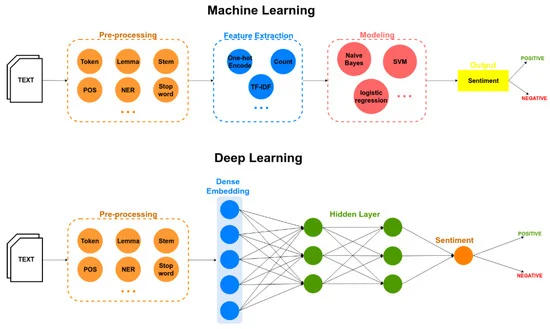

In [1]:
from transformers import pipeline

model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [3]:
model('i love cat')[0]

{'label': 'POSITIVE', 'score': 0.99978107213974}

In [8]:
model('i hate cat')[0]

{'label': 'NEGATIVE', 'score': 0.9929839372634888}

In [9]:
if model('i love cat')[0]['label'] == 'POSITIVE':
    print('positive')
else:
    print('negative')

positive


https://huggingface.co/docs/transformers/v5.0.0rc1/en/pipeline_tutorial#tasks

https://www.goodreads.com/quotes

In [11]:
model('So many books, so little time.')[0]

{'label': 'NEGATIVE', 'score': 0.9848105311393738}

In [13]:
import requests
from bs4 import BeautifulSoup

# The Goodreads quote URL
review_url = 'https://www.goodreads.com/quotes'

# Set a User-Agent header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    response = requests.get(review_url, headers=headers)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all quote containers
    for quote_tag in soup.find_all("div", class_="quoteText"):

        # 1. Access the first text content directly.
        # This contents list usually looks like: [Quote Text, <br/>, '\n  ―\n  \n    ', <span>author info</span>]
        # The quote text is the first item in the list.
        if quote_tag.contents:
            quote_text = quote_tag.contents[0].strip()

            # 2. Extract the author's name from the child span for a complete result
            author_span = quote_tag.find("span", class_="authorOrTitle")
            author_name = author_span.text.strip() if author_span else "Unknown Author"

            print(f'Quote: {quote_text}')
            #print(f'Author: {author_name}')
            #print("-" * 40)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

Quote: “Be yourself; everyone else is already taken.”
Quote: “I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”
Quote: “So many books, so little time.”
Quote: “Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.”
Quote: “A room without books is like a body without a soul.”
Quote: “Be who you are and say what you feel, because those who mind don't matter, and those who matter don't mind.”
Quote: “You've gotta dance like there's nobody watching,
Quote: “You know you're in love when you can't fall asleep because reality is finally better than your dreams.”
Quote: “You only live once, but if you do it right, once is enough.”
Quote: “Be the change that you wish to see in the world.”
Quote: “In three words I can sum up everything I've learned about life: it goes on.”
Quote: “If you want to know wh

In [15]:
import requests
from bs4 import BeautifulSoup

# The Goodreads quote URL
review_url = 'https://www.goodreads.com/quotes'

# Set a User-Agent header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    response = requests.get(review_url, headers=headers)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all quote containers
    for quote_tag in soup.find_all("div", class_="quoteText"):

        # 1. Access the first text content directly.
        # This contents list usually looks like: [Quote Text, <br/>, '\n  ―\n  \n    ', <span>author info</span>]
        # The quote text is the first item in the list.
        if quote_tag.contents:
            quote_text = quote_tag.contents[0].strip()

            # 2. Extract the author's name from the child span for a complete result
            author_span = quote_tag.find("span", class_="authorOrTitle")
            author_name = author_span.text.strip() if author_span else "Unknown Author"

            print(f'Emotion of {quote_text}: {model(quote_text)[0]['label']}')
            #print(f'Author: {author_name}')
            #print("-" * 40)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

Emotion of “Be yourself; everyone else is already taken.”: NEGATIVE
Emotion of “I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.”: NEGATIVE
Emotion of “So many books, so little time.”: NEGATIVE
Emotion of “Two things are infinite: the universe and human stupidity; and I'm not sure about the universe.”: NEGATIVE
Emotion of “A room without books is like a body without a soul.”: NEGATIVE
Emotion of “Be who you are and say what you feel, because those who mind don't matter, and those who matter don't mind.”: POSITIVE
Emotion of “You've gotta dance like there's nobody watching,: NEGATIVE
Emotion of “You know you're in love when you can't fall asleep because reality is finally better than your dreams.”: POSITIVE
Emotion of “You only live once, but if you do it right, once is enough.”: POSITIVE
Emotion of “Be the change that you wish to see 